In [1]:
from transpile_benchy.metrics.gate_counts import (
    DepthMetric,
    TotalMetric,
    TotalSwaps,
)
from qiskit.circuit.library import iSwapGate
from qiskit.transpiler import CouplingMap
from mirror_gates.pass_managers import Mirage, QiskitLevel3
from mirror_gates.utilities import SubsMetric
from mirror_gates.logging import transpile_benchy_logger

In [2]:
# N = 4
# coupling_map = CouplingMap.from_line(N)
coupling_map = CouplingMap.from_grid(6, 6)

In [3]:
from transpile_benchy.library import CircuitLibrary

library = CircuitLibrary.from_txt("../../../circuits/medium_circuits.txt")
# library = CircuitLibrary.from_txt("../../circuits/debug.txt")

In [9]:
# XXX set consolidate to False
# this is allowed only because my pass manager will preserve consolidation
# see post_stage, I call fastconsolidate manually

# NOTE: use TotalSwaps to verify baselines have > 0 swaps
# otherwise, there is no room for improvement.
# we can include these if we want to show our methods will still work
# but somewhat trivial since we just append VF2Layout
metrics = [
    DepthMetric(consolidate=False),
    TotalMetric(consolidate=False),
    TotalSwaps(consolidate=False),
    SubsMetric(),
]

transpilers = [
    QiskitLevel3(coupling_map, cx_basis=True),
    Mirage(coupling_map, logger=transpile_benchy_logger, cx_basis=True),
]

In [10]:
from transpile_benchy.benchmark import Benchmark

benchmark = Benchmark(
    transpilers=transpilers,
    circuit_library=library,
    metrics=metrics,
    logger=transpile_benchy_logger,
    num_runs=5,
)

benchmark.run()
# print(benchmark)

INFO:transpile_benchy:Running benchmarks for circuits...
Circuits from library:   0%|          | 0/13 [00:00<?, ?it/s]INFO:transpile_benchy:Running benchmark for circuit qec9xz_n17


Loading qec9xz_n17 from QASMBench


Circuits from library:   8%|▊         | 1/13 [01:20<16:01, 80.10s/it]INFO:transpile_benchy:Running benchmark for circuit seca_n11


Loading seca_n11 from QASMBench


Circuits from library:  15%|█▌        | 2/13 [02:52<15:57, 87.07s/it]INFO:transpile_benchy:Running benchmark for circuit qram_n20


Loading qram_n20 from QASMBench


Circuits from library:  23%|██▎       | 3/13 [04:49<16:48, 100.86s/it]INFO:transpile_benchy:Running benchmark for circuit knn_n25


Loading knn_n25 from QASMBench


Circuits from library:  31%|███       | 4/13 [06:56<16:41, 111.26s/it]INFO:transpile_benchy:Running benchmark for circuit swap_test_n25


Loading swap_test_n25 from QASMBench


Circuits from library:  38%|███▊      | 5/13 [09:01<15:28, 116.05s/it]INFO:transpile_benchy:Running benchmark for circuit bigadder_n18


Loading bigadder_n18 from QASMBench


Circuits from library:  46%|████▌     | 6/13 [11:24<14:37, 125.39s/it]INFO:transpile_benchy:Running benchmark for circuit multiplier_n15


Loading multiplier_n15 from QASMBench


Circuits from library:  54%|█████▍    | 7/13 [15:06<15:41, 156.95s/it]INFO:transpile_benchy:Running benchmark for circuit qft_n18


Loading qft_n18 from QASMBench


Circuits from library:  62%|██████▏   | 8/13 [19:13<15:28, 185.69s/it]INFO:transpile_benchy:Running benchmark for circuit sat_n11


Loading sat_n11 from QASMBench


Circuits from library:  69%|██████▉   | 9/13 [22:47<12:58, 194.58s/it]INFO:transpile_benchy:Running benchmark for circuit portfolioqaoa_n16


Loading portfolioqaoa_n16 from Hardcoded


Circuits from library:  77%|███████▋  | 10/13 [31:36<14:53, 297.69s/it]INFO:transpile_benchy:Running benchmark for circuit qftentangled_n16


Loading qftentangled_n16 from MQTBench


Circuits from library:  85%|████████▍ | 11/13 [35:11<09:04, 272.45s/it]INFO:transpile_benchy:Running benchmark for circuit qpeexact_n16


Loading qpeexact_n16 from MQTBench


Circuits from library:  92%|█████████▏| 12/13 [38:35<04:11, 251.61s/it]INFO:transpile_benchy:Running benchmark for circuit ae_n16


Loading ae_n16 from MQTBench


Circuits from library: 100%|██████████| 13/13 [42:05<00:00, 194.24s/it]


In [14]:
print(benchmark)


Transpiler: Mirage-$\texttt{CNOT}$

  Metric: accepted_subs
  Circuit: ae_n16                                   Mean result: 0.869                          Trials: [0.7983193277310925, 0.8991596638655462, 0.9663865546218487, 0.7310924369747899, 0.9495798319327731]
  Circuit: bigadder_n18                             Mean result: 0.294                          Trials: [0.30973451327433627, 0.2831858407079646, 0.3008849557522124, 0.3274336283185841, 0.24778761061946902]
  Circuit: knn_n25                                  Mean result: 0.425                          Trials: [0.323943661971831, 0.30985915492957744, 0.5774647887323944, 0.5633802816901409, 0.352112676056338]
  Circuit: multiplier_n15                           Mean result: 0.397                          Trials: [0.40609137055837563, 0.37055837563451777, 0.4365482233502538, 0.3401015228426396, 0.43147208121827413]
  Circuit: portfolioqaoa_n16                        Mean result: 0.997                          Trials: [0.99721448

In [15]:
benchmark.summary_statistics(transpilers[0], transpilers[1])

{'monodromy_depth': {'average_change': -25.478804821342727,
  'aggregrate_change': -30.82117261215621,
  'best_circuit': 'portfolioqaoa_n16',
  'worst_circuit': 'multiplier_n15'},
 'monodromy_total': {'average_change': -8.136041406692014,
  'aggregrate_change': -17.022006965022328,
  'best_circuit': 'qpeexact_n16',
  'worst_circuit': 'qec9xz_n17'},
 'total_swaps': {'average_change': -47.18098707999135,
  'aggregrate_change': -68.34894290722244,
  'best_circuit': 'portfolioqaoa_n16',
  'worst_circuit': 'qec9xz_n17'},
 'accepted_subs': {'average_change': inf,
  'aggregrate_change': inf,
  'best_circuit': 'qec9xz_n17',
  'worst_circuit': 'qec9xz_n17'},
 'total_runtime': {'average_change': 8541.282391600256,
  'aggregrate_change': 7809.880617620055,
  'best_circuit': 'qec9xz_n17',
  'worst_circuit': 'knn_n25'}}

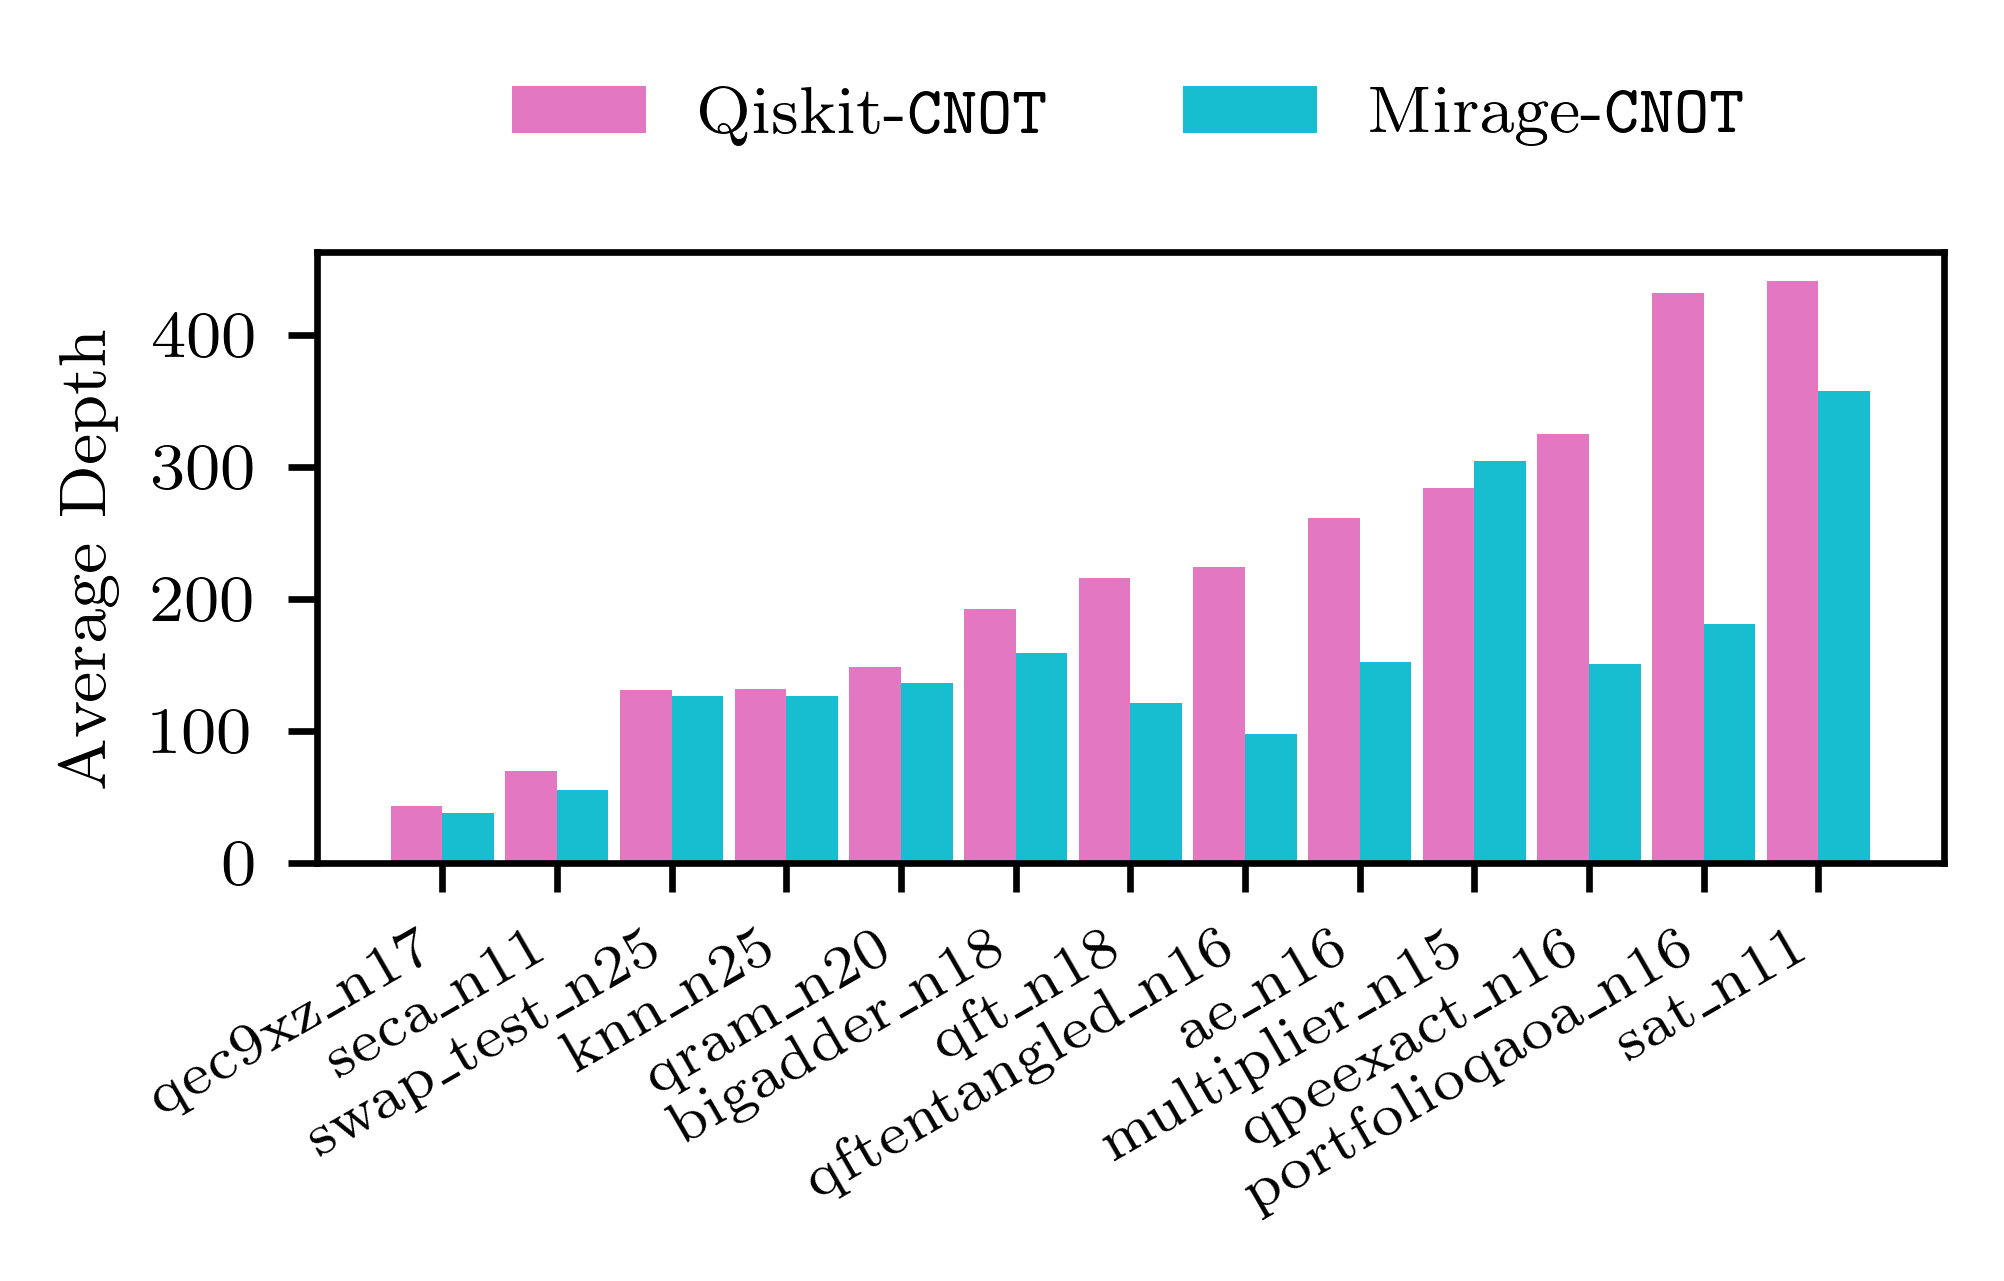

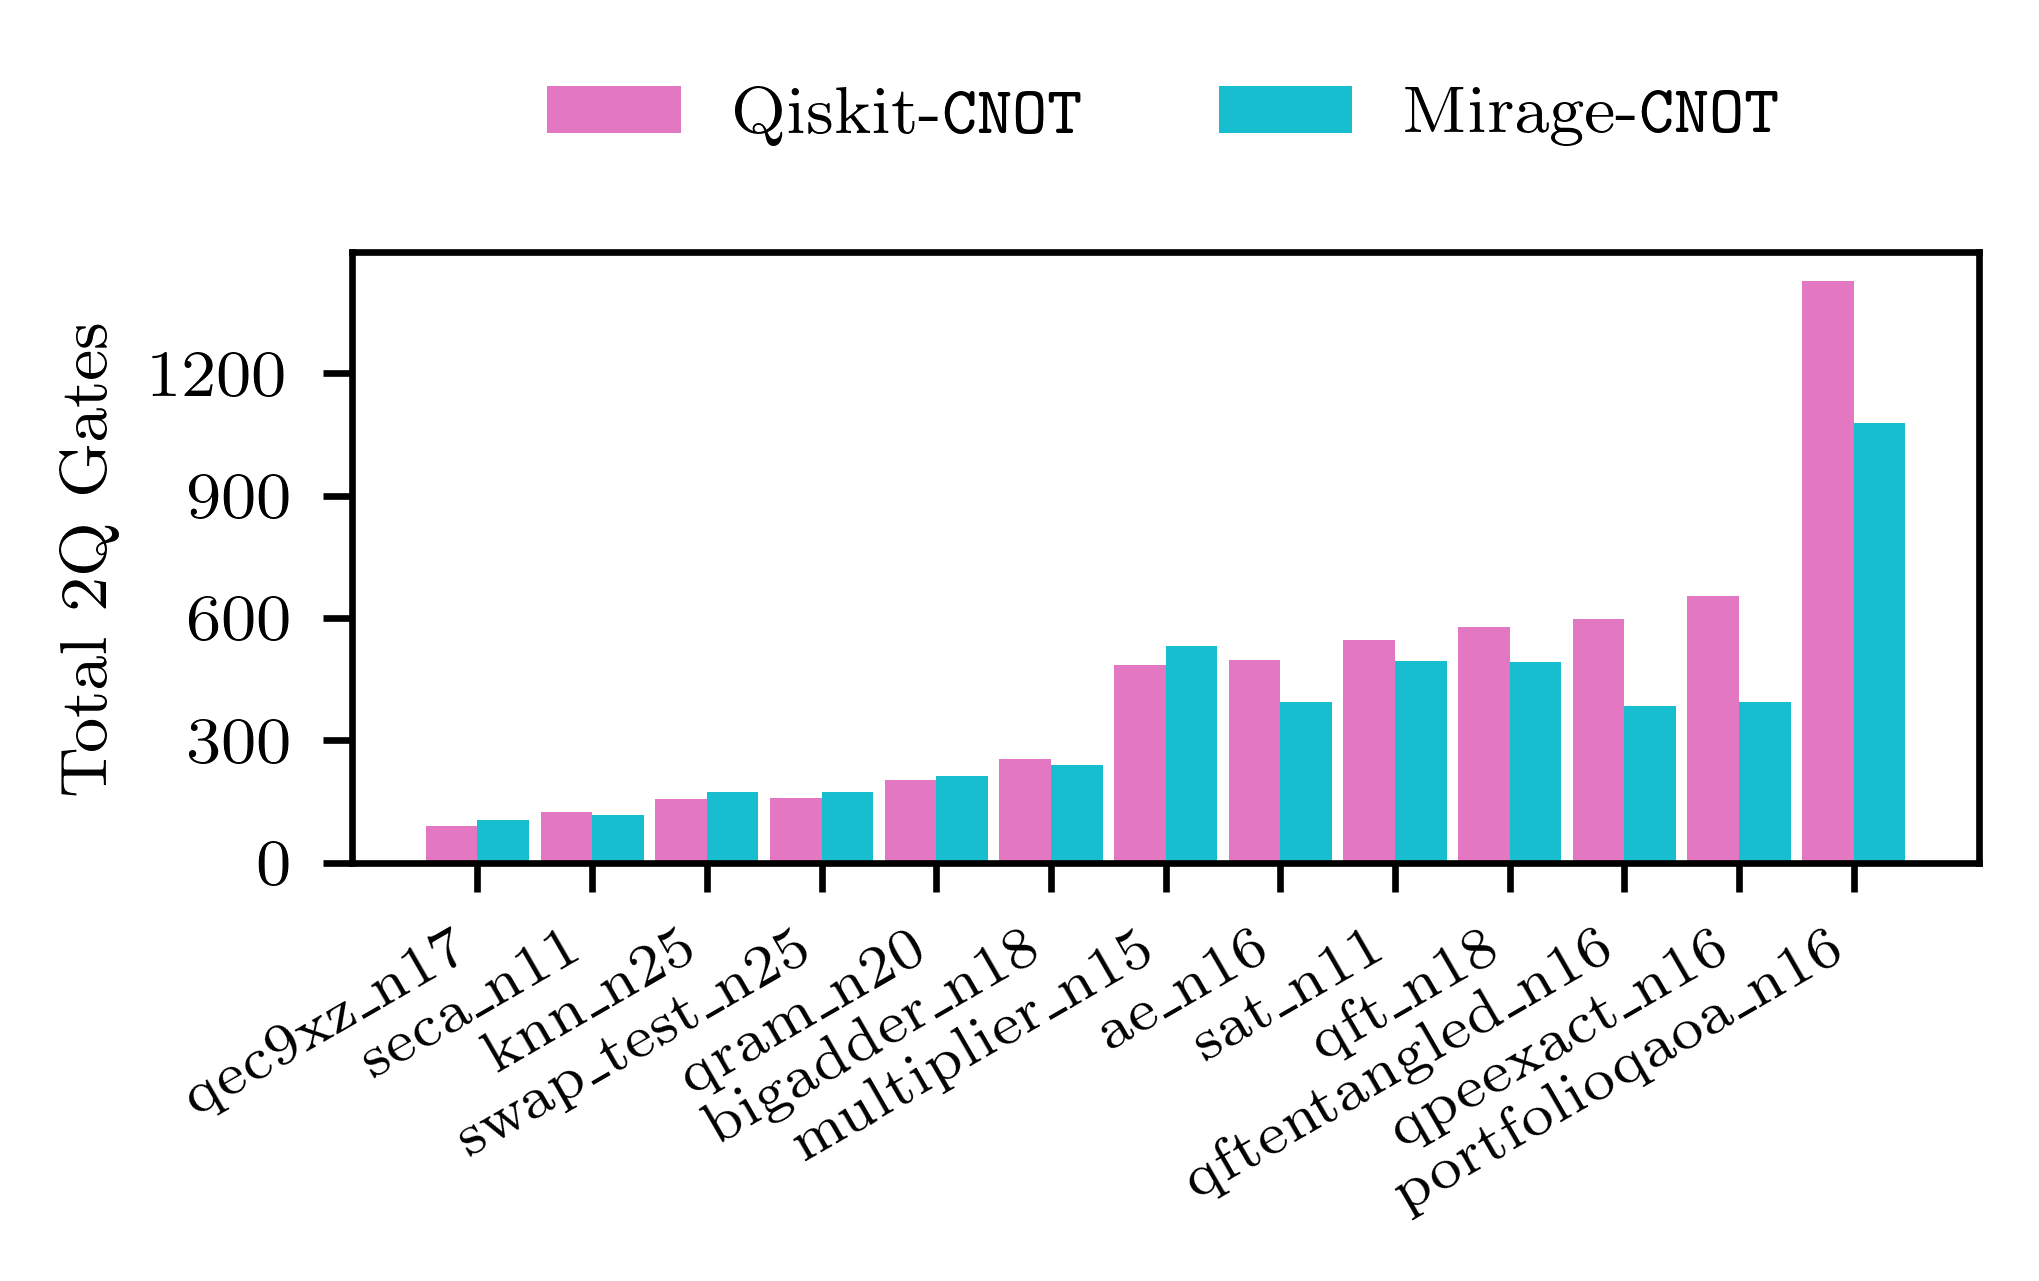

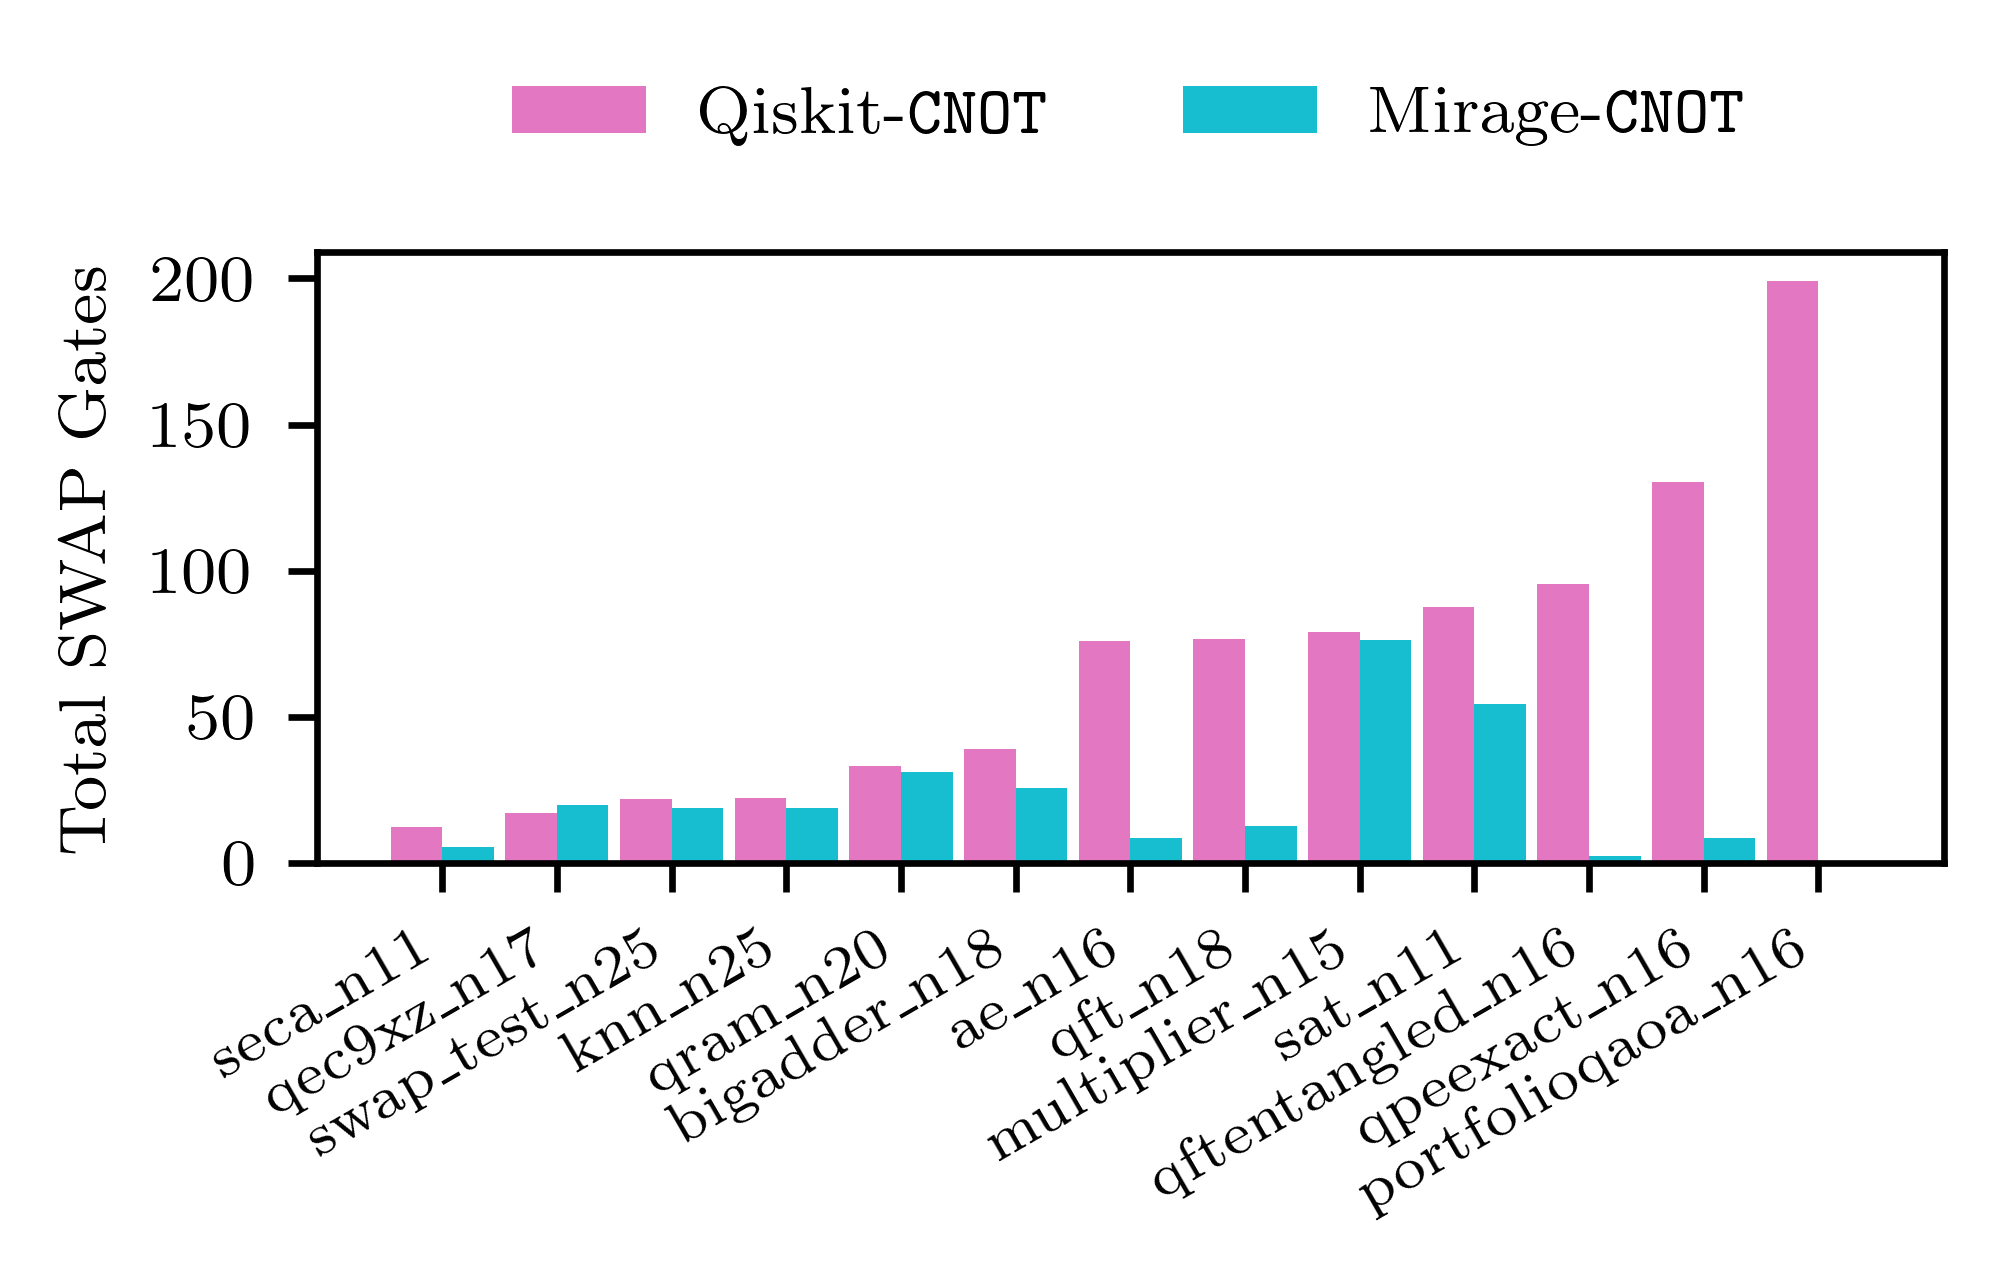

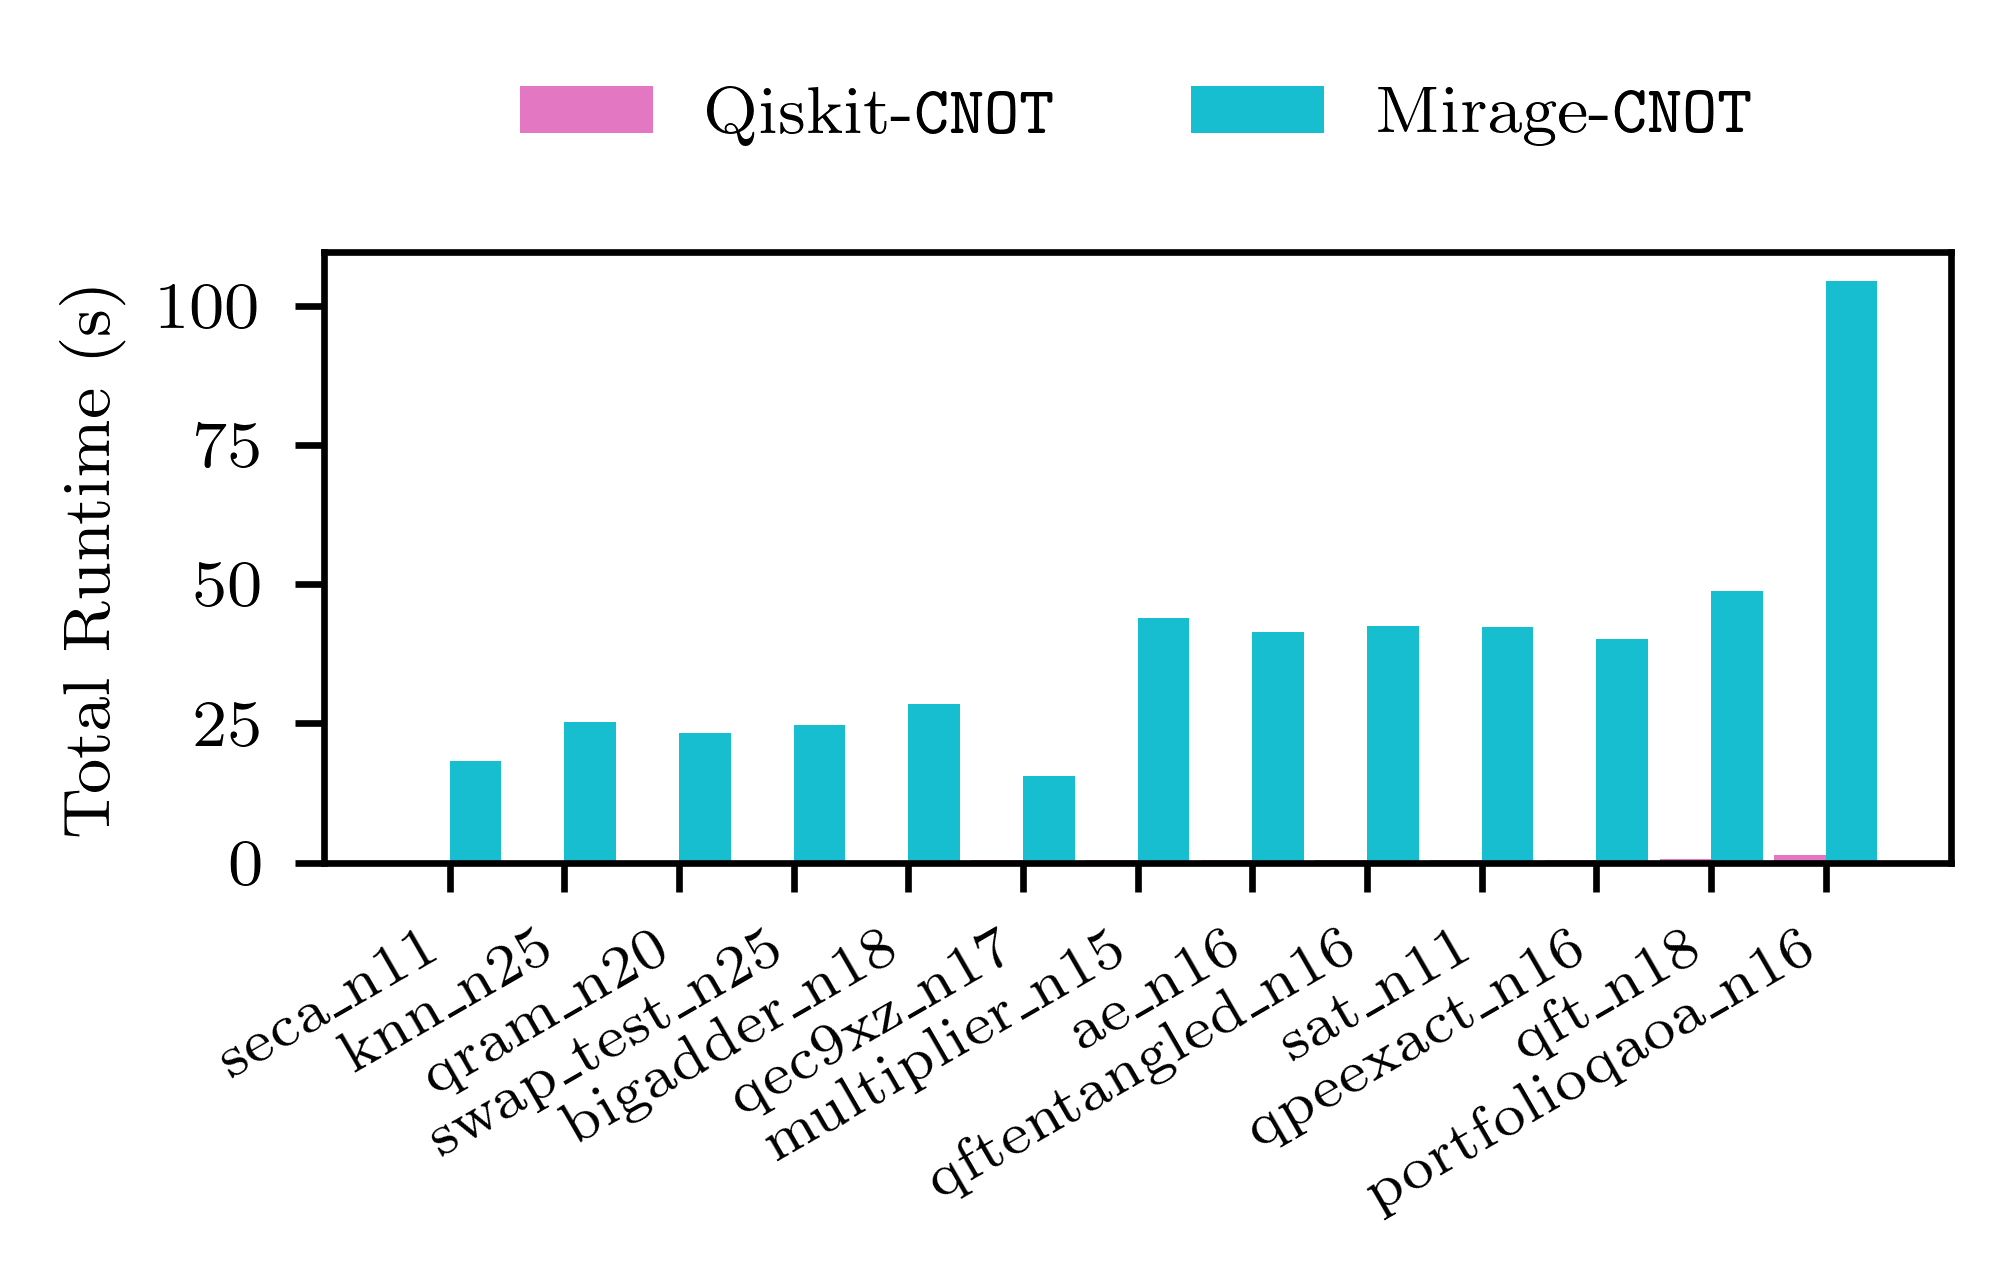

In [18]:
from transpile_benchy.render import plot_benchmark

plot_benchmark(
    benchmark,
    save=1,
    legend_show=1,
    filename="syc_sl",
    color_override=[7, 8],
)